<a href="https://colab.research.google.com/github/Cate28/Estadistica-I-y-II/blob/main/Parte_pr%C3%A1ctica_primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta parte práctica se realizará el modelo de regreseión simple de los datos del ICFES en Colombia, donde se usarán las variables de los puntajes de las cinco materias. Además, se tratará de hallar cuales son las variables explicativas.

In [2]:
from google.colab import files # Para cargar archivo en google colab
uploaded = files.upload()


Saving SB11_20231.TXT to SB11_20231.TXT


In [51]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau
bites = io.BytesIO(uploaded['SB11_20231.TXT'])
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')
datos_icfes.head(4)



<ipython-input-51-6f4be5b63dc5>:11: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']), delimiter='¬')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
1,TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
2,TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR


In [7]:
datos_icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12704 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             12704 non-null  object 
 1   ESTU_NACIONALIDAD              12704 non-null  object 
 2   ESTU_GENERO                    12704 non-null  object 
 3   ESTU_FECHANACIMIENTO           12704 non-null  object 
 4   PERIODO                        12704 non-null  int64  
 5   ESTU_CONSECUTIVO               12704 non-null  object 
 6   ESTU_ESTUDIANTE                12704 non-null  object 
 7   ESTU_PAIS_RESIDE               12704 non-null  object 
 8   ESTU_DEPTO_RESIDE              12704 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          12704 non-null  int64  
 10  ESTU_MCPIO_RESIDE              12704 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          12704 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        12702 non-null 

In [8]:
datos_icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

In [9]:
tabla_regresion = datos_icfes[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS',  'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
1,47.223972,67,58,68,68,NaN
2,67.695519,37,42,35,35,NaN
3,41.863163,45,41,41,27,58.0


En la tabla anterior se pueden observar los datos de los puntajes obtenidos en cada materia en las pruebas icfes.

In [10]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
 (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) &
 (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
 (~datos_icfes['PUNT_INGLES'].isna())]

En esta parte del código se quitan los valores faltantes de los datos obtenidos, esto se hace con el fin de que al hacer la gráfrica del modelo de regresión lineal no afecten estos valores faltantes.

<Axes: >

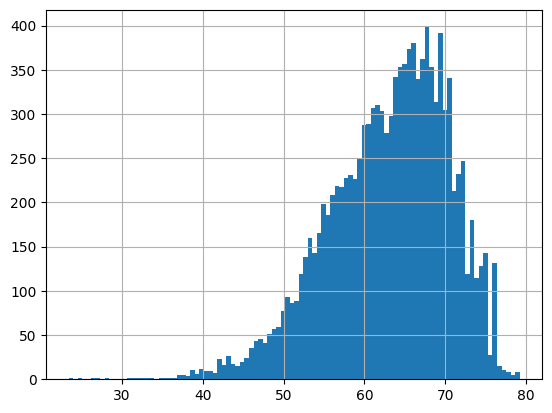

In [11]:
ESTU_INSE_INDIVIDUAL = tabla_regresion[(tabla_regresion['ESTU_INSE_INDIVIDUAL']<80)]
ESTU_INSE_INDIVIDUAL['ESTU_INSE_INDIVIDUAL'].hist(bins = 100)

<Axes: >

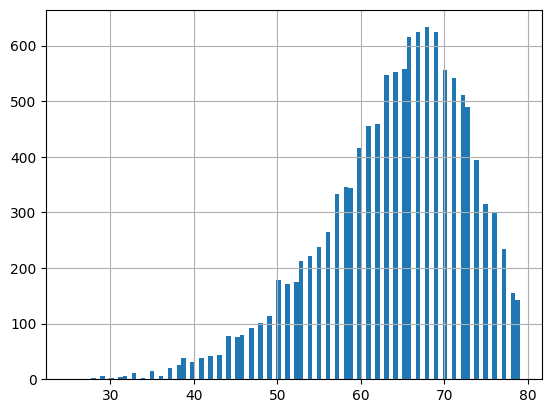

In [12]:
PUNT_LECTURA_CRITICA = tabla_regresion[(tabla_regresion['PUNT_LECTURA_CRITICA']<80)]
PUNT_LECTURA_CRITICA['PUNT_LECTURA_CRITICA'].hist(bins = 100)

<Axes: >

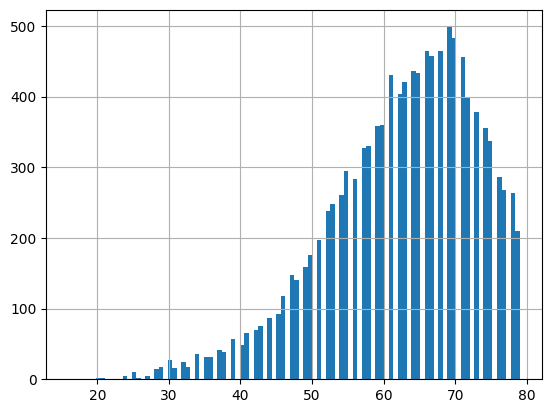

In [13]:
PUNT_MATEMATICAS = tabla_regresion[(tabla_regresion['PUNT_MATEMATICAS']<80)]
PUNT_MATEMATICAS['PUNT_MATEMATICAS'].hist(bins = 100)

<Axes: >

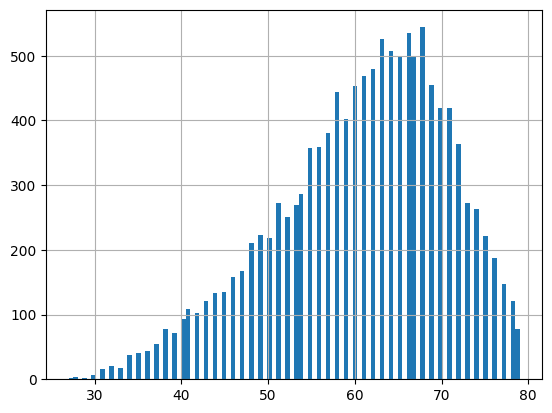

In [14]:
PUNT_C_NATURALES = tabla_regresion[(tabla_regresion['PUNT_C_NATURALES']<80)]
PUNT_C_NATURALES['PUNT_C_NATURALES'].hist(bins = 100)

<Axes: >

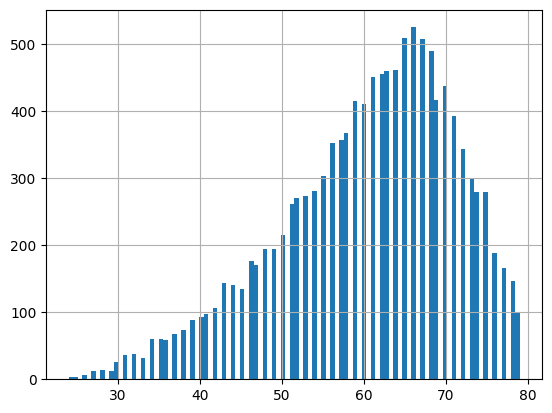

In [15]:
PUNT_SOCIALES_CIUDADANAS = tabla_regresion[(tabla_regresion['PUNT_SOCIALES_CIUDADANAS']<80)]
PUNT_SOCIALES_CIUDADANAS['PUNT_SOCIALES_CIUDADANAS'].hist(bins = 100)

<Axes: >

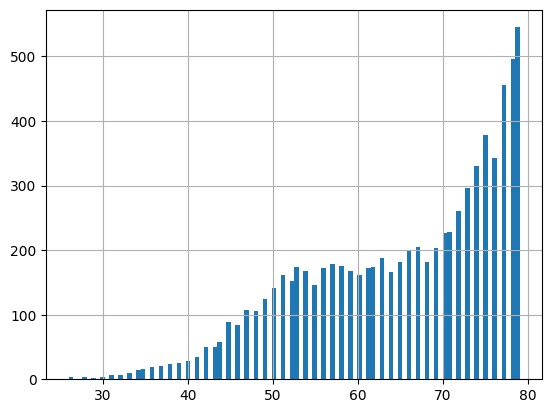

In [16]:
PUNT_INGLES = tabla_regresion[(tabla_regresion['PUNT_INGLES']<80)]
PUNT_INGLES['PUNT_INGLES'].hist(bins = 100)

In [17]:
tabla_regresion1 = tabla_regresion[(tabla_regresion['ESTU_INSE_INDIVIDUAL']<80) & (tabla_regresion['PUNT_LECTURA_CRITICA']<80) & (tabla_regresion['PUNT_MATEMATICAS']<80) & (tabla_regresion['PUNT_C_NATURALES']<80) & (tabla_regresion['PUNT_SOCIALES_CIUDADANAS']<80) & (tabla_regresion['PUNT_INGLES']<80)]
tabla_regresion1.head(5)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0


In [18]:
x = np.array(tabla_regresion1['PUNT_LECTURA_CRITICA']).reshape(-1,1)
y = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)


In [19]:
x0 = np.array(tabla_regresion1['PUNT_LECTURA_CRITICA']).reshape(-1,1)
y0 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
modelo_lineal01 = LinearRegression()
regresion01 = modelo_lineal01.fit(x0, y0)
pred_lineal01 = regresion01.predict(x0)


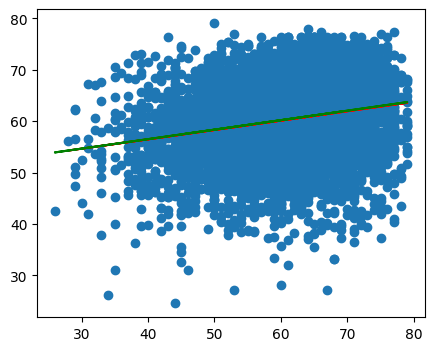

In [20]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx, pred_lineal, linestyle='-', color = 'red')
plt.plot(tabla_regresion1['PUNT_LECTURA_CRITICA'], pred_lineal01, linestyle='-', color = 'green')
plt.show()

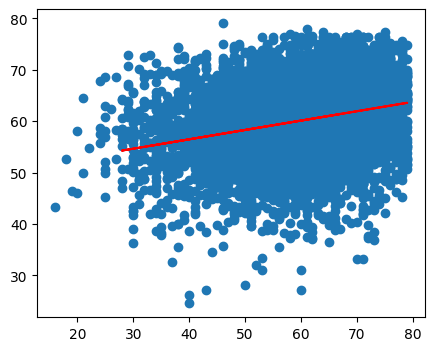

In [21]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx, pred_lineal, linestyle='-', color = 'red')
#plt.plot(tabla_regresion1['PUNT_MATEMATICAS'], pred_lineal01, linestyle='-', color = 'green')
plt.show()

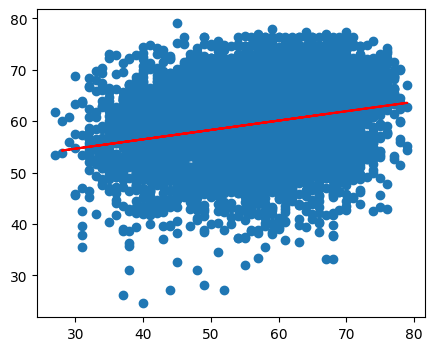

In [22]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx, pred_lineal, linestyle='-', color = 'red')
#plt.plot(tabla_regresion1['PUNT_C_NATURALES'], pred_lineal01, linestyle='-', color = 'green')
plt.show()

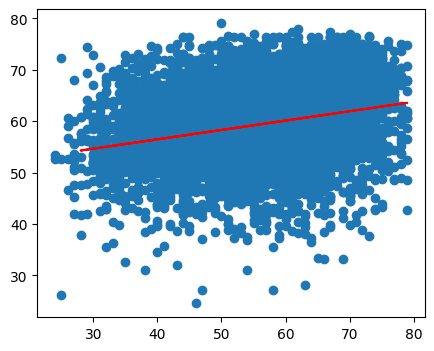

In [23]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx, pred_lineal, linestyle='-', color = 'red')
#plt.plot(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], pred_lineal01, linestyle='-', color = 'green')
plt.show()

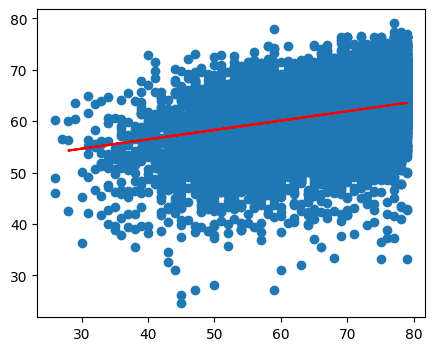

In [24]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.plot(testx, pred_lineal, linestyle='-', color = 'red')
#plt.plot(tabla_regresion1['PUNT_INGLES'], pred_lineal01, linestyle='-', color = 'green')
plt.show()

In [25]:
X = tabla_regresion1.drop('ESTU_INSE_INDIVIDUAL', axis = 1)
Y= tabla_regresion1['ESTU_INSE_INDIVIDUAL']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)


,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
665,62,67,63,60,57.0
1492,61,59,62,58,63.0
2146,51,55,51,45,53.0
9504,65,62,65,71,77.0


In [26]:
#importnumpy as np
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(X, Y)
pred_lineal = regresion.predict(testX)
#regresion = modelo_lineal.fit(np.array(tabla_regresion1['PUNT_LECTURA_CRITICA]).reshape(-1,1), np.array(tabla_regresion1['ESTU-INSE-INDIVIDUAL]).reshape(-1,1))
#pred_lineal = regresion.predict(np.array(tabla_regresion1['t_ges']).reshape(-1,1))
#pred_lineal



In [27]:
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.18986018174466224

In [28]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [29]:
X1 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS']]
Y1 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
train1X, test1X,train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
train1X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS
665,62,67,63,60
1492,61,59,62,58
2146,51,55,51,45
9504,65,62,65,71


In [30]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal1 = regresion1.score(test1X, test1Y)
r2_lineal1

0.07195873329687108

La variable PUNT_INGLES es una variables explicativa ya que en el modelo de regresión lineal dió como resultado de 0.07195873329687108 ya que es un valor muy pequeño.

In [31]:
X2 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_INGLES']]
Y2 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
train2X, test2X,train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
train2X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_INGLES
665,62,67,63,57.0
1492,61,59,62,63.0
2146,51,55,51,53.0
9504,65,62,65,77.0


In [32]:
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X, train2Y)
pred_lineal2 = regresion2.predict(test2X)
r2_lineal2 = regresion2.score(test2X, test2Y)
r2_lineal2

0.18776064526088942

In [33]:
X3 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y3 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
train3X, test3X,train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)
train3X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
665,62,67,60,57.0
1492,61,59,58,63.0
2146,51,55,45,53.0
9504,65,62,71,77.0


In [34]:
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X, train3Y)
pred_lineal3 = regresion3.predict(test3X)
r2_lineal3 = regresion3.score(test3X, test3Y)
r2_lineal3

0.18788005382159856

In [35]:
X4 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y4 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
train4X, test4X,train4Y, test4Y = train_test_split(X4, Y4, test_size = 0.2, random_state = 0)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(train4X, train4Y)
pred_lineal4 = regresion4.predict(test4X)
r2_lineal4 = regresion4.score(test4X, test4Y)
r2_lineal4

0.18686308445749655

In [36]:
X5 = tabla_regresion1[['PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
Y5 = tabla_regresion1['ESTU_INSE_INDIVIDUAL']
train5X, test5X,train5Y, test5Y = train_test_split(X5, Y5, test_size = 0.2, random_state = 0)
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(train5X, train5Y)
pred_lineal5 = regresion5.predict(test5X)
r2_lineal5 = regresion5.score(test5X, test5Y)
r2_lineal5

0.18642808052096627

Además, la siguiente variable explicativa en este caso de datos es la variable PUNT_LECTURA_CRITICA, ya que dió 0.18642808052096627

In [37]:
XY, Z = tabla_regresion1[['PUNT_SOCIALES_CIUDADANAS' , 'PUNT_INGLES']], tabla_regresion1['ESTU_INSE_INDIVIDUAL']
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state= 0)
trainXY.head(4)

,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
665,60,57.0
1492,58,63.0
2146,45,53.0
9504,71,77.0


In [38]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ) #Se entrena el modelo

LinearRegression()

In [39]:
modelo1.score(testXY, testZ)

0.18631744868534506

In [40]:
array = modelo1.coef_
array

array([-0.0355783 ,  0.31667236])

<Axes: >

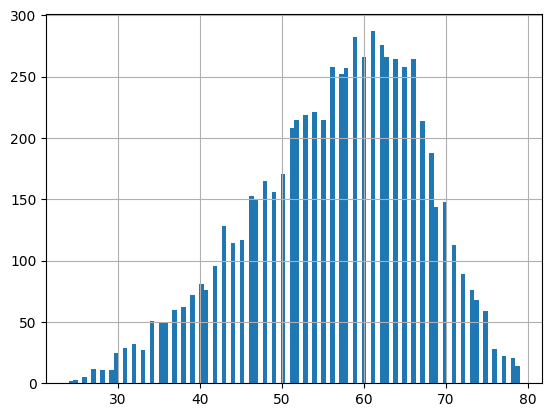

In [41]:
tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'].hist(bins = 100)

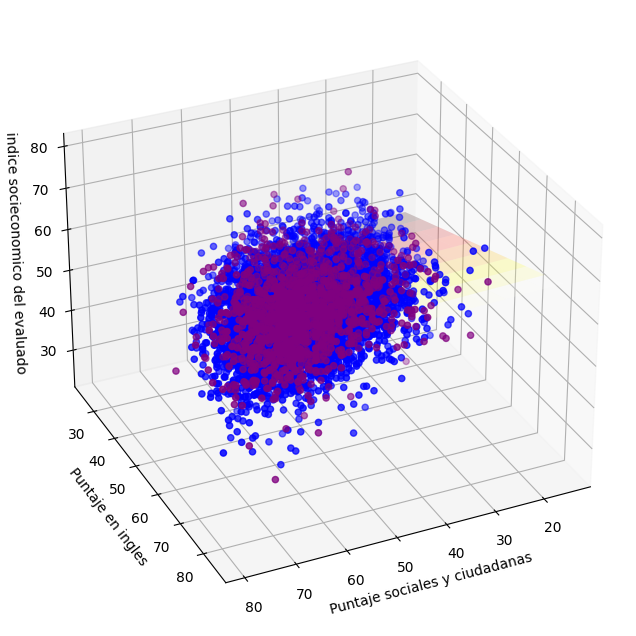

In [42]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(25, 85, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY['PUNT_SOCIALES_CIUDADANAS'], trainXY['PUNT_INGLES'], trainZ, c='blue', s=20)
ax.scatter(testXY['PUNT_SOCIALES_CIUDADANAS'], testXY['PUNT_INGLES'], testZ, c='purple', s=20)
ax.view_init(elev=30. , azim=65)

ax.set_xlabel('Puntaje sociales y ciudadanas')
ax.set_ylabel('Puntaje en ingles')
ax.set_zlabel('indice socieconomico del evaluado')
plt.show()

In [46]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,10,10,10, 10, 10, 10, 10),
                                       max_iter = 500,
                                       activation = 'relu',
                                       solver = 'adam',
                                       learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10),
             learning_rate='invscaling', max_iter=500)

In [47]:
mlp_reg.score(testX, testY)

0.1846038951026665

In [48]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [50]:
no_obs = np.array([[30, 60, 3, 3, 19]])
print('Se espera que el puntaje del icfes sea', mlp_reg.predict(no_obs), 'bajo la percepción multicapa y',
      modelo_lineal.predict(no_obs), 'bajo el modelo de regresión lineal múltiple')

Se espera que el puntaje del icfes sea [68.19574209] bajo la percepción multicapa y [48.75766311] bajo el modelo de regresión lineal múltiple


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
pearson_corr = np.corrcoef(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], tabla_regresion1['PUNT_LECTURA_CRITICA'])[0,1]
pearman_corr, _ = spearmanr(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], tabla_regresion1['PUNT_LECTURA_CRITICA'])
kendall_corr, _ = kendalltau(tabla_regresion1['ESTU_INSE_INDIVIDUAL'], tabla_regresion1['PUNT_LECTURA_CRITICA'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}")

Los coeficientes de correlación de Pearson, Spearmam y Kendall son respectivamente 0.21521482377843168, 0.2123684646115301 y 0.14535256754255724


Como se puede observar en los resultados de los coeficientes de correlación de Pearson, Spearman y Kendall se ve que dieron valores pequeños significa que los valores de ESTU_INSE_INDIVIDUAL estan insignificantemente correlacionados con los valores de PUNT_LECTURA_CRITICA.  

In [55]:
pearson_corr1 = np.corrcoef(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['PUNT_LECTURA_CRITICA'])[0,1]
pearman_corr1, _ = spearmanr(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['PUNT_LECTURA_CRITICA'])
kendall_corr1, _ = kendalltau(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['PUNT_LECTURA_CRITICA'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr1}, {pearman_corr1} y {kendall_corr1}")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5643058928434732, 0.5239085025990431 y 0.37636784959315067


Como se puede observar en los resultados de los coeficientes de correlación de Pearson, Spearman se ve que dieron valores entre 0.5 y 0.6, significa que los valores de PUNT_INGLES estan moderadamente correlacionados con los valores de PUNT_LECTURA_CRITICA. Además, que el coeficiente de correlacion de Kendall la variable PUNT_INGLES esta discretamente correlacionada con los valores de PUNT_LECTURA_CRITICA. Es decir, que la variable PUNT_MATEMATICAS es una variable explicativa.

In [56]:
pearson_corr2 = np.corrcoef(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['PUNT_LECTURA_CRITICA'])[0,1]
pearman_corr2, _ = spearmanr(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['PUNT_LECTURA_CRITICA'])
kendall_corr2, _ = kendalltau(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['PUNT_LECTURA_CRITICA'])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr2}, {pearman_corr2} y {kendall_corr2}")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.7468074651616751, 0.7397738237778867 y 0.5605928497793211


Como se puede observar en los resultados de los coeficientes de correlación de Pearson, Spearman se ve que dieron valores entre 0.7 y 0.8, significa que los valores de PUNT_SOCIALES_CIUDADANAS estan sustancialmente correlacionados con los valores de PUNT_LECTURA_CRITICA. Además, que el coeficiente de correlacion de Kendall la variable PUNT_SOCIALES_CIUDADANAS esta moderadamente correlacionada con los valores de PUNT_LECTURA_CRITICA. Es decir, que la variable PUNT_MATEMATICAS es una variable explicativa.




In [58]:
tabla_regresion2 = tabla_regresion[(tabla_regresion['ESTU_INSE_INDIVIDUAL']>80) & (tabla_regresion['PUNT_LECTURA_CRITICA']<80) & (tabla_regresion['PUNT_MATEMATICAS']<80) & (tabla_regresion['PUNT_C_NATURALES']<80) & (tabla_regresion['PUNT_SOCIALES_CIUDADANAS']<80) & (tabla_regresion['PUNT_INGLES']<80)]
tabla_regresion2.head(10)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
8910,80.45357,61,68,67,50,78.0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ESTU_INSE_INDIVIDUAL']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ESTU_INSE_INDIVIDUAL'}, axis=1)
              .sort_values('ESTU_INSE_INDIVIDUAL', ascending=True))
  xs = counted['ESTU_INSE_INDIVIDUAL']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('ESTU_INSE_INDIVIDUAL', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ESTU_INSE_INDIVIDUAL')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['PUNT_LECTURA_CRITICA']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'PUNT_LECTURA_CRITICA'}, axis=1)
              .sort_values('PUNT_LECTURA_CRITICA', ascending=True))
  xs = counted['PUNT_LECTURA_CRITICA']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('PUNT_LECTURA_CRITICA', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PUNT_LECTURA_CRITICA')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['PUNT_MATEMATICAS']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'PUNT_MATEMATICAS'}, axis=1)
              .sort_values('PUNT_MATEMATICAS', ascending=True))
  xs = counted['PUNT_MATEMATICAS']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('PUNT_MATEMATICAS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PUNT_MATEMATICAS')
_ = plt.ylabel('count()')